In [8]:
import os 
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.utils import np_utils

In [9]:
data_path=r'D:\ML&DL\Projects\CNN Image Classification\PetImages'

categories=os.listdir(data_path)
print(categories)

labels=np.arange(len(categories))
print(labels)

label_dict=dict(zip(categories,labels))
print(label_dict)

['Cat', 'Dog']
[0 1]
{'Cat': 0, 'Dog': 1}


In [10]:
img_size=50

data=[]
target=[]

for category in categories:
    
    imgs_path=os.path.join(data_path,category)
    #print(imgs_path)
    img_names=os.listdir(imgs_path)
    #print(img_names)
    
    for img_name in img_names:
        
        try:
            img_path=os.path.join(imgs_path,img_name)
            img=cv2.imread(img_path)
            #print(img_path)
            
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            img=cv2.resize(img,(img_size,img_size))
            

            data.append(img)
            target.append(label_dict[category])
        
        except Exception as e:
            
            if os.path.exists("demofile.txt"):
                os.remove("demofile.txt")
                print("File Deleted")
            else:
                print("The file does not exist")
            print(e)
            
        #cv2.imshow('LIVE',img)
        #k=cv2.waitKey(1000)
        #if(k==27):
        #    break
#cv2.destroyAllWindows()

In [11]:
data_new=np.array(data)
target_new=np.array(target)

print(data_new.shape)
print(target_new.shape)

(24946, 50, 50)
(24946,)


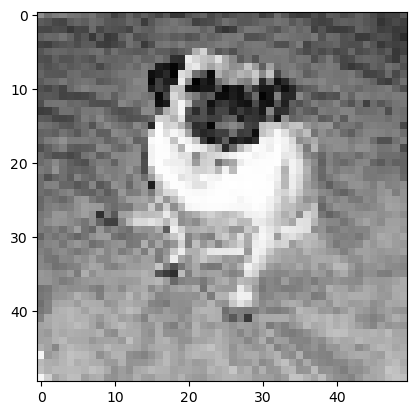

In [12]:
plt.imshow(data[20000],cmap='gray')

In [13]:
target_new[20000]

1

In [14]:
data_new = data_new/255.00
print('data shape : ',data_new.shape)

data_out=data_new.reshape(data_new.shape[0],data_new.shape[1],data_new.shape[2],1)
print('data_new shape : ',data_out.shape)

data shape :  (24946, 50, 50)
data_new shape :  (24946, 50, 50, 1)


In [15]:
target_out=np_utils.to_categorical(target_new)
print('target_new shape : ',target_out.shape)

target_new shape :  (24946, 2)


In [18]:
# np.save('data-memory-save',data_out)
# np.save('target-memory-save',target_out)